In [33]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

import scipy.stats as stats

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

In [34]:
def rolling_mean(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(24*365).mean()
    rolstd = timeseries.rolling(24*365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [35]:
def test_stationarity(timeseries):
    adf = ADF(timeseries)
    print(adf.summary().as_text())
    print("\n")

    from arch.unitroot import PhillipsPerron
    pp = PhillipsPerron(timeseries)
    print(pp.summary().as_text())
    print("\n")

    from arch.unitroot import KPSS
    kpss = KPSS(timeseries)
    print(kpss.summary().as_text())

In [36]:
df = pd.read_csv('timeserie_train.csv', parse_dates=['data'], index_col='data')

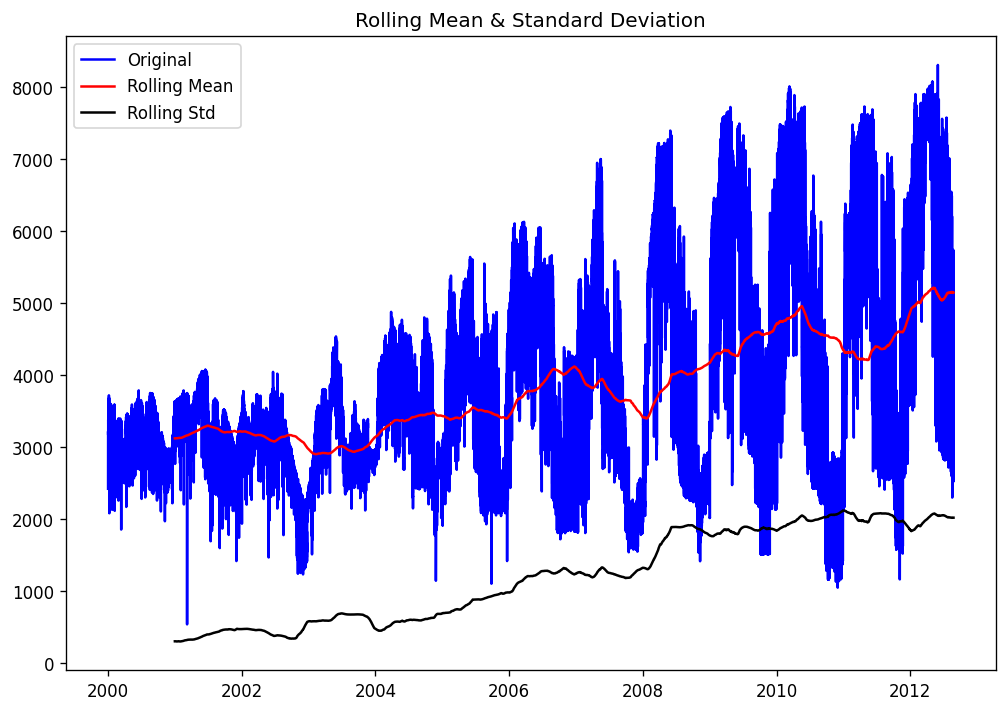

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.780
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -18.606
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


    KPSS Stationarity Test Results   
Test Statistic                 12.339
P-value                         0.000
Lags                              191
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
N

In [37]:
rolling_mean(df)
test_stationarity(df)

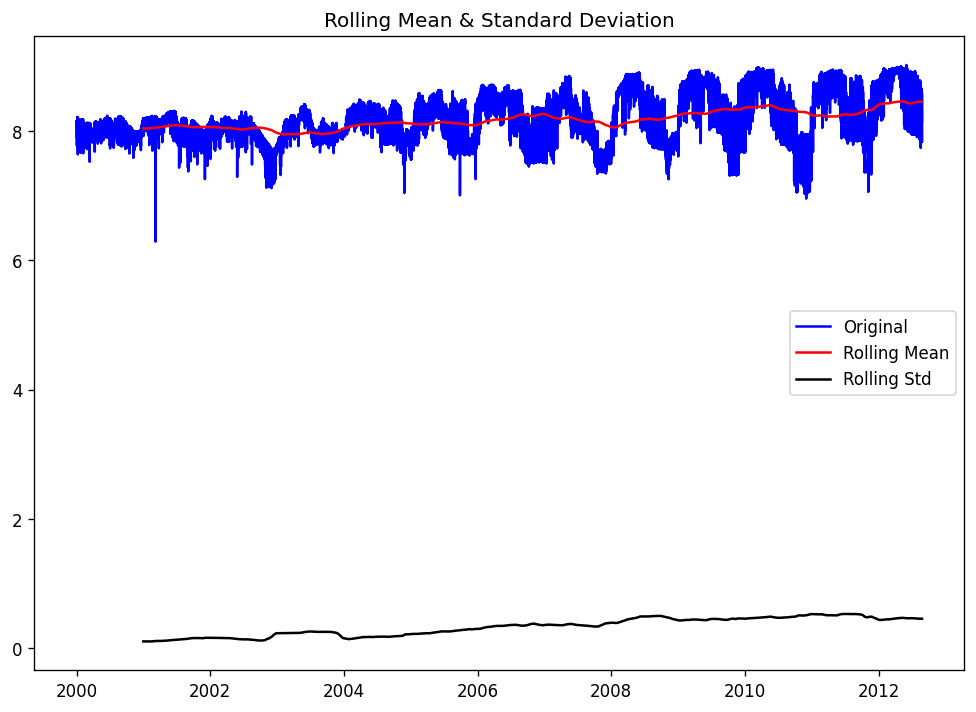

/Users/nivaldogomes-labcodes/Documents/Dropbox/My Mac (Home-Nivaldos-MacBook-Pro.local)/Documents/1 - Projetos/modelagem analitica/.env/lib/python3.7/site-packages/arch/unitroot/unitroot.py:238: RuntimeWarning: invalid value encountered in multiply
  xpx = empty((m + maxlag, m + maxlag)) * nan


   Augmented Dickey-Fuller Results   
Test Statistic                 -6.243
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -21.260
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


    KPSS Stationarity Test Results   
Test Statistic                  8.209
P-value                         0.000
Lags                              190
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
N

In [38]:
ts_log = np.log(df)
rolling_mean(ts_log)
test_stationarity(ts_log)

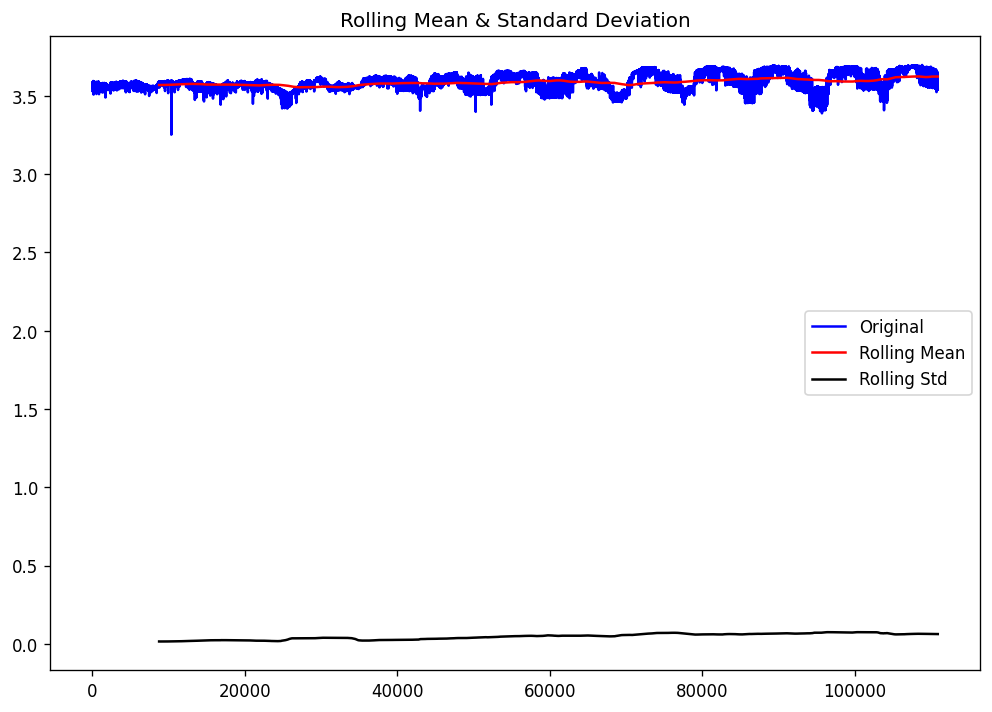

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.420
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -22.341
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


    KPSS Stationarity Test Results   
Test Statistic                  7.132
P-value                         0.000
Lags                              189
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
N

In [39]:
fitted_data, fitted_lambda = stats.boxcox(df.energia) 
rolling_mean(pd.DataFrame(fitted_data))
test_stationarity(fitted_data)